# Assignment 3.2 Applying Classification

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
results = pd.read_csv("results.csv")
results.replace({"Czech Republic": "Czechia"}, inplace=True)
shootouts = pd.read_csv("shootouts.csv")
rankings = pd.read_csv("rankings.csv")
results['date'] = pd.to_datetime(results['date'])
results.insert(5, "score_diff",results['home_score'] - results['away_score'])
shootouts['date'] = pd.to_datetime(shootouts['date'])
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])
results.dropna(inplace=True)

## Question: How much does playing at home affect the home team's performance? (That is, given that a team plays at home, can we predict whether they win the game?)
### Hypothesis: The home crowd can only influence the outcome so much, since the strength of the team most likely contributes more to who wins the game. Thus, we do not expect our model to have strong predicting power.

In [11]:
results['home_win'] = results['score_diff'] > 0
results.replace({True: 1, False: 0}, inplace=True)

In [42]:
no_neutral_no_win = list(results[results['neutral']==0]['home_win']).count(0)
no_neutral_win = list(results[results['neutral']==0]['home_win']).count(1)
neutral_no_win = list(results[results['neutral']==1]['home_win']).count(0)
neutral_win = list(results[results['neutral']==1]['home_win']).count(1)

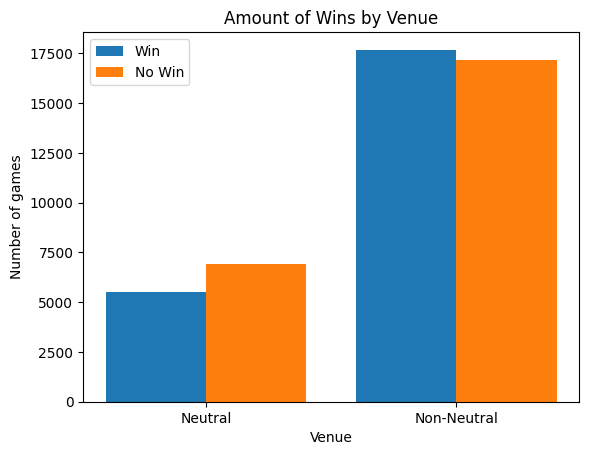

In [47]:
X = ['Neutral', 'Non-Neutral'] 
win = [neutral_win, no_neutral_win] 
no_win = [neutral_no_win, no_neutral_no_win] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, win, 0.4, label = 'Win') 
plt.bar(X_axis + 0.2, no_win, 0.4, label = 'No Win') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Venue") 
plt.ylabel("Number of games") 
plt.title("Amount of Wins by Venue") 
plt.legend() 
plt.show() 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

X = np.array(results['neutral']).reshape(-1, 1)
y = np.array(results['home_win'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Precision: 0.51
Recall: 0.76
F1 Score: 0.61
Accuracy: 0.52
Confusion Matrix:
[[2106 5071]
 [1675 5329]]


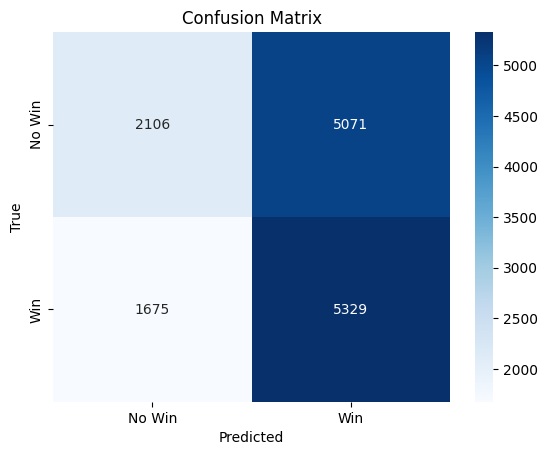

In [36]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Win', 'Win'], yticklabels=['No Win', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()